In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import nibabel as nb
import networkx as nx
import os

from multiplot import feature_plot
from collections import OrderedDict

font = {'weight' : 'bold',
        'size'   : 14}

import matplotlib
matplotlib.rc('font', **font)

In [2]:
# Initializing dataset names
dnames = list(('/Users/gkiar/code/classes/upward-spiral/grelliam/data/cpac200/KKI2009/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/cpac200/MRN114/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/cpac200/MRN1313/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/cpac200/SWU4/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/cpac200/BNU1/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/cpac200/BNU3/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/cpac200/NKI1/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/cpac200/NKIENH/'))

names = list(('KKI2009', 'MRN114', 'MRN1313', 'SWU4', 'BNU1', 'BNU3', 'NKI1', 'NKIENH'))

# dnames = list(('/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/KKI2009/',
#                '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/MRN114/',
#                '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/NKI1/'))

# names = list(('KKI2009', 'MRN114', 'NKI1'))

print "Datasets: " + ", ".join(names)
print "D = " + str(len(names))

# Getting graph names
fs = OrderedDict()

for idx, dd in enumerate(names):
        fs[dd] = [root+fl for root, dir, files in os.walk(dnames[idx]) for fl in files if fl.endswith(".graphml")]

Datasets: KKI2009, MRN114, MRN1313, SWU4, BNU1, BNU3, NKI1, NKIENH
D = 8


In [3]:
def loadGraphs(filenames, printer=False):
        gstruct = OrderedDict()
        for idx, files in enumerate(filenames):
            if printer:
                print "Loading: " + files
            gstruct[files] = nx.read_graphml(files)
        return gstruct

In [4]:
graphs = OrderedDict()
for idx, name in enumerate(names):
    graphs[name] = loadGraphs(fs[name], printer=False)

In [5]:
graphs.keys()

['KKI2009', 'MRN114', 'MRN1313', 'SWU4', 'BNU1', 'BNU3', 'NKI1', 'NKIENH']

## NNZ

In [6]:
nnz = OrderedDict()
for idx, name in enumerate(names):
    nnz[name] = OrderedDict((subj, len(nx.edges(graphs[name][subj]))) for subj in graphs[name])

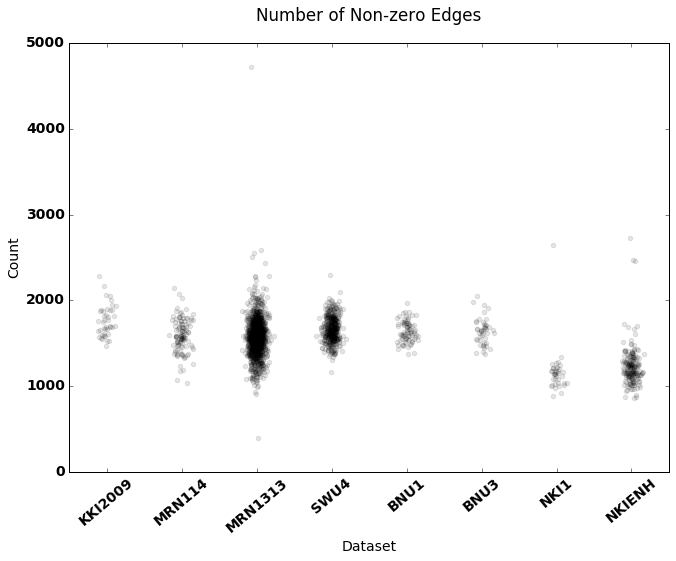

In [19]:
nnz_plt = feature_plot(nnz, names, 'Number of Non-zero Edges', plot_mode='scatter',
                       fig_outfile='../figs/multi_nnz_cpac200_scatter.png')

## Degree Distribution

In [8]:
deg = OrderedDict()
for idx, name in enumerate(names):
    deg[name] = OrderedDict((subj, np.array(nx.degree(graphs[name][subj]).values())) for subj in graphs[name])

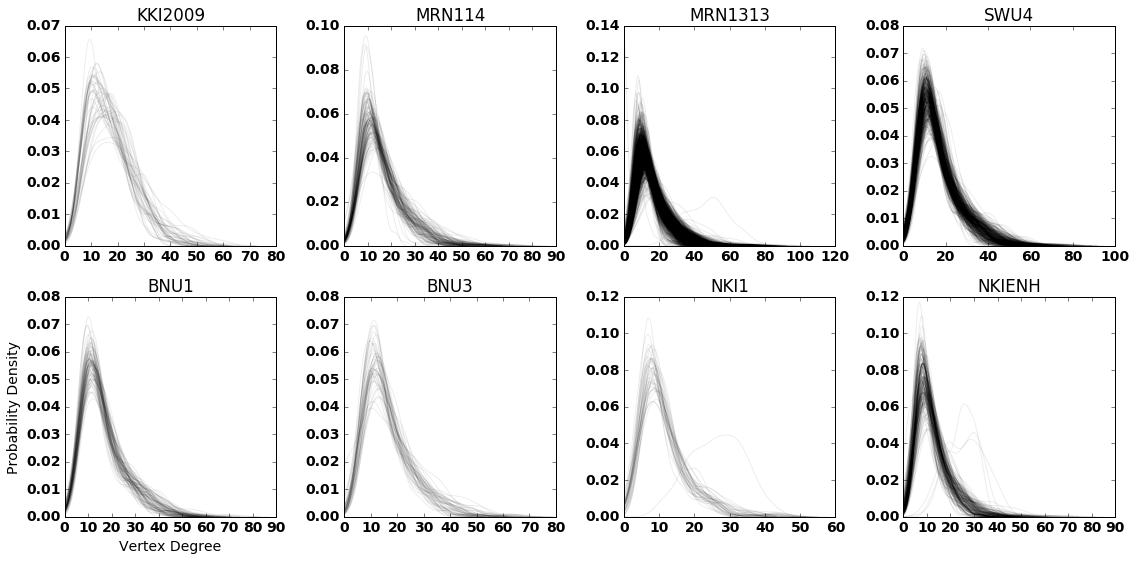

In [18]:
dd_plt = feature_plot(deg, names, 'Degree', plot_mode='hist', xlab = 'Vertex Degree',
                      ylab = 'Probability Density', fig_outfile = '../figs/multi_deg_cpac200_hist.png')

## Edge Weights

In [10]:
ew = OrderedDict()
for idx, name in enumerate(names):
    ew[name] = OrderedDict((subj, [graphs[name][subj].get_edge_data(e[0],e[1])['weight']
                            for e in graphs[name][subj].edges()]) for subj in graphs[name])

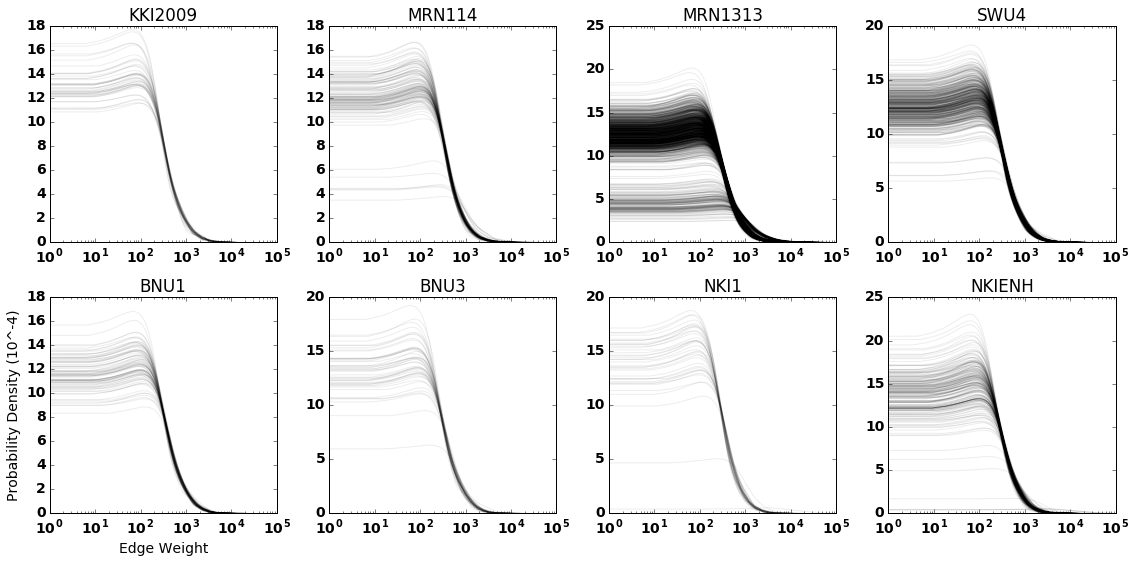

In [17]:
ew_plt = feature_plot(ew, names, 'Edge Weights', plot_mode='hist', xlab = 'Edge Weight', axis_scale='log', yscale=1e4,
                      ylab = 'Probability Density (10^-4)', fig_outfile='../figs/multi_ew_cpac200_hist.png')

## Clustering Coefficient

In [12]:
ccoefs = OrderedDict()
for idx, name in enumerate(names):
    ccoefs[name] = OrderedDict((subj, nx.clustering(graphs[name][subj]).values()) for subj in graphs[name])

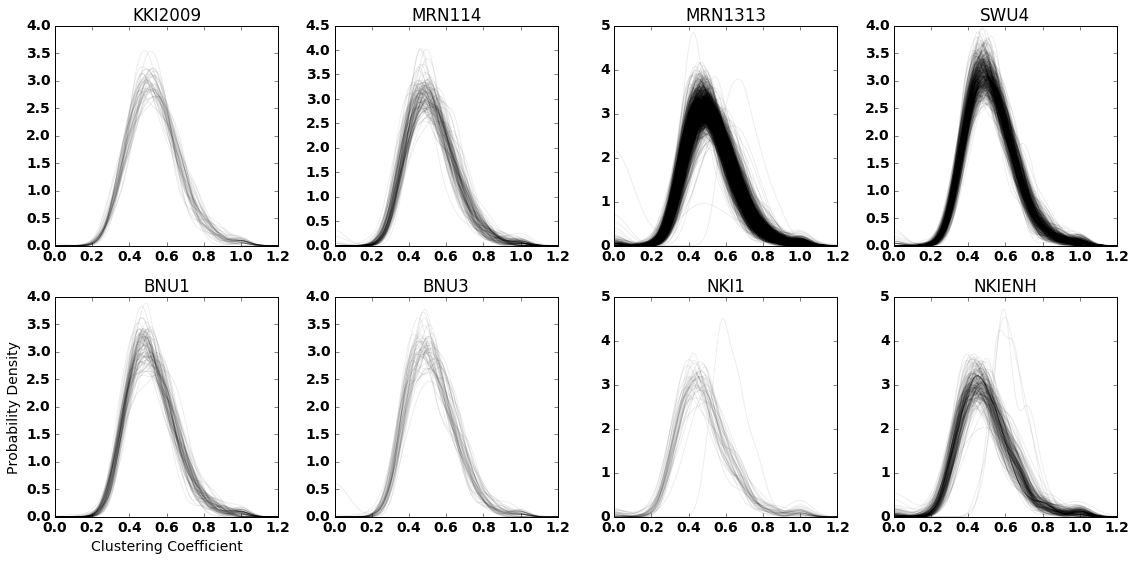

In [16]:
ccoefs_plt = feature_plot(ccoefs, names, "Clustering Coefficient", plot_mode='hist', xlab = 'Clustering Coefficient',
                          ylab = 'Probability Density', fig_outfile='../figs/multi_ccoefs_cpac200_hist.png')

## Scan Statistic-1

In [14]:
i = 1
def scan_statistic(mygs, i):
    ss = OrderedDict()
    for key in mygs.keys():
        g = mygs[key]
        tmp = np.array(())
        for n in g.nodes():
            subgraph = nx.ego_graph(g, n, radius = i)
            tmp = np.append(tmp, np.sum([subgraph.get_edge_data(e[0],e[1])['weight'] for e in subgraph.edges()]))
        ss[key] = tmp
    return ss

ss1 = OrderedDict()
for idx, name in enumerate(names):
    ss1[name] = scan_statistic(graphs[name], i)

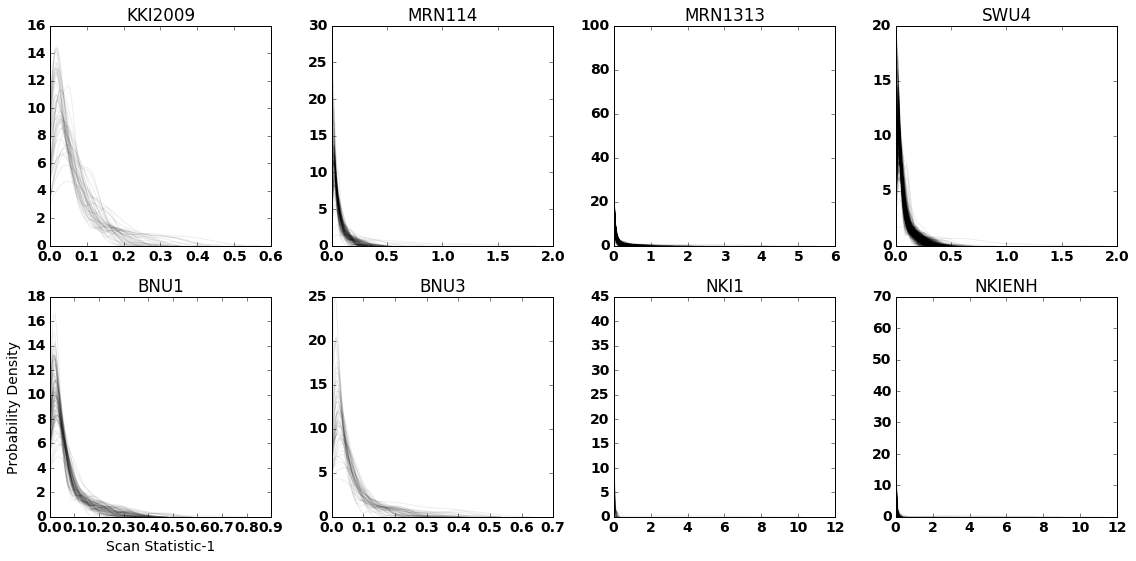

In [15]:
ss1_plt = feature_plot(ss1, names, "Scan Statistic-1", plot_mode='hist', xlab = 'Scan Statistic-1', scale_factor=1e6,
                       ylab = 'Probability Density', fig_outfile='../figs/multi_ss1_cpac200_hist.png')

## Eigen Sequence

In [20]:
laplacian = OrderedDict()
eigs = OrderedDict()
for idx, name in enumerate(names):
    laplacian[name] = OrderedDict((subj, nx.normalized_laplacian_matrix(graphs[name][subj])) for subj in graphs[name])
    eigs[name] = OrderedDict((subj, np.sort(np.linalg.eigvals(laplacian[name][subj].A))[::-1]) for subj in graphs[name])

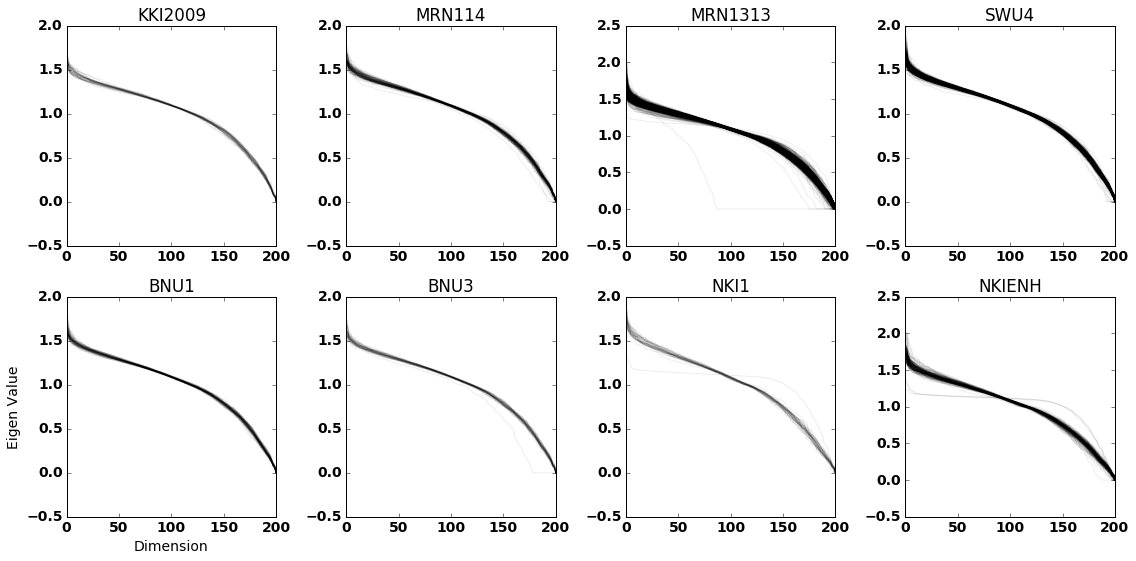

In [21]:
eigs_plt = feature_plot(eigs, names, "Eigen Sequence", plot_mode='series', xlab = 'Dimension',
                        ylab = 'Eigen Value', fig_outfile='../figs/multi_eig_cpac200_seq.png')

## Betweenness Centrality

In [22]:
centrality = OrderedDict()
for idx, name in enumerate(names):
    centrality[name] = OrderedDict((subj, nx.algorithms.betweenness_centrality(graphs[name][subj]).values())
                                   for subj in graphs[name])

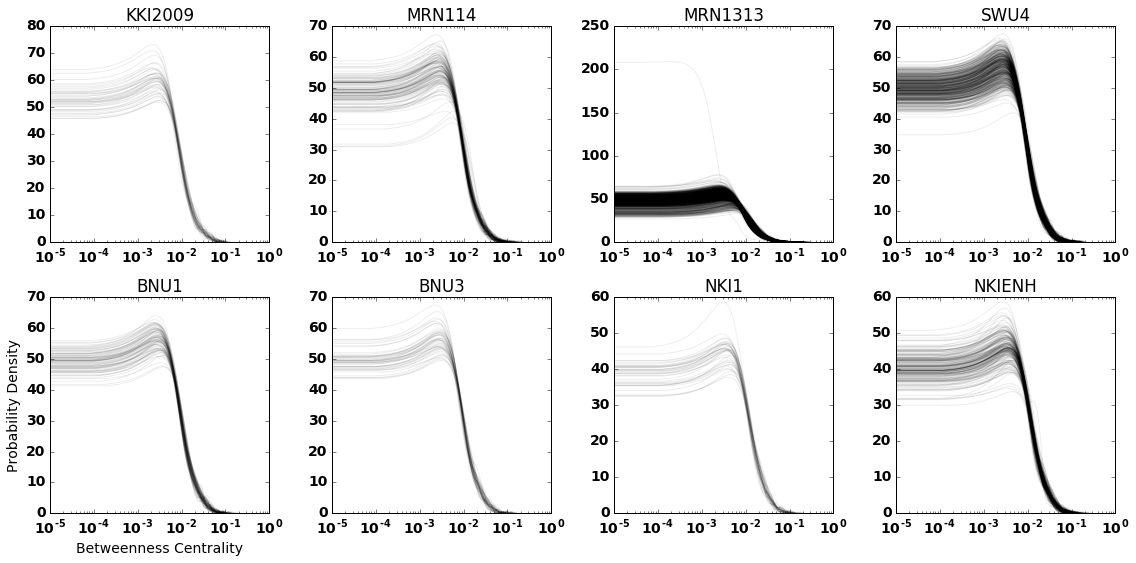

In [24]:
centrality_plt = feature_plot(centrality, names, "Betweenness Centrality", plot_mode='hist', axis_scale='log', 
                              xlab = 'Betweenness Centrality', ylab = 'Probability Density',
                              fig_outfile='../figs/multi_centrality_cpac200_hist.png')

## N-Local 3-cliques

In [ ]:
n3_cliques = OrderedDict()

for idx, name in enumerate(names):
    tq = OrderedDict((subj, [clique for clique in
                             nx.algorithms.clique.enumerate_all_cliques(graphs[name][subj])
                             if len(clique) == 3]) for subj in graphs[name])
    n3_cliques[name] = OrderedDict((subj, len(tq[subj])) for subj in tq)

In [ ]:
n3c_plt = feature_plot(n3_cliques, names, 'Number of 3-Cliques', plot_mode='scatter',
                       fig_outfile='../figs/multi_n3c_scatter.png')